### Importing libraries and train data

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sn
import sklearn
import sklearn.metrics
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image

In [4]:
# importing the dataset into the notebook
df = pd.read_csv('/content/Insurance Fraud - TRAIN-3000.csv', header=0, sep=',')
df.head()

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


### EDA

In [ ]:
# looking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [ ]:
# looking at data balance
df['FRAUDFOUND'].value_counts()

No     2600
Yes     399
Name: FRAUDFOUND, dtype: int64

In [ ]:
df.isnull().sum()

MONTH                   0
WEEKOFMONTH             0
DAYOFWEEK               0
MAKE                    0
ACCIDENTAREA            0
DAYOFWEEKCLAIMED        0
MONTHCLAIMED            0
WEEKOFMONTHCLAIMED      0
SEX                     0
MARITALSTATUS           0
AGE                     0
FAULT                   0
POLICYTYPE              0
VEHICLECATEGORY         0
VEHICLEPRICE            0
REPNUMBER               0
DEDUCTIBLE              0
DRIVERRATING            0
DAYS_POLICY_ACCIDENT    0
DAYS_POLICY_CLAIM       0
PASTNUMBEROFCLAIMS      0
AGEOFVEHICLE            0
AGEOFPOLICYHOLDER       0
POLICEREPORTFILED       0
WITNESSPRESENT          0
AGENTTYPE               0
NUMBEROFSUPPLIMENTS     0
ADDRESSCHANGE_CLAIM     0
NUMBEROFCARS            0
YEAR                    0
BASEPOLICY              0
FRAUDFOUND              0
dtype: int64

In [ ]:
corrMatrix = df.corr()
print (corrMatrix)

                    WEEKOFMONTH  WEEKOFMONTHCLAIMED       AGE  REPNUMBER  \
WEEKOFMONTH            1.000000            0.263826  0.002312   0.018869   
WEEKOFMONTHCLAIMED     0.263826            1.000000 -0.002163   0.003199   
AGE                    0.002312           -0.002163  1.000000  -0.034636   
REPNUMBER              0.018869            0.003199 -0.034636   1.000000   
DEDUCTIBLE            -0.027950           -0.005053  0.078183  -0.006252   
DRIVERRATING           0.003924            0.027158  0.024606  -0.006393   
YEAR                  -0.024049            0.019825  0.014480   0.023798   

                    DEDUCTIBLE  DRIVERRATING      YEAR  
WEEKOFMONTH          -0.027950      0.003924 -0.024049  
WEEKOFMONTHCLAIMED   -0.005053      0.027158  0.019825  
AGE                   0.078183      0.024606  0.014480  
REPNUMBER            -0.006252     -0.006393  0.023798  
DEDUCTIBLE            1.000000      0.028647 -0.001282  
DRIVERRATING          0.028647      1.000000  0.0

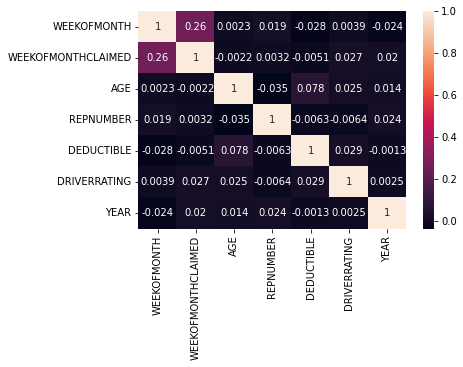

In [ ]:
# plotting the correlations between the variables
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.describe()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,2.781260,2.671224,40.055352,8.511837,407.302434,2.496832,1995.114038
std,1.286055,1.261614,13.497026,4.601437,41.847258,1.118365,0.606007
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,4.000000,400.000000,1.000000,1995.000000
50%,3.000000,3.000000,38.000000,9.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,49.000000,12.000000,400.000000,3.000000,1995.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [5]:
cat_col = [col for col in df.columns if df[col].dtypes == "O"]
cat_col

['MONTH',
 'DAYOFWEEK',
 'MAKE',
 'ACCIDENTAREA',
 'DAYOFWEEKCLAIMED',
 'MONTHCLAIMED',
 'SEX',
 'MARITALSTATUS',
 'FAULT',
 'POLICYTYPE',
 'VEHICLECATEGORY',
 'VEHICLEPRICE',
 'DAYS_POLICY_ACCIDENT',
 'DAYS_POLICY_CLAIM',
 'PASTNUMBEROFCLAIMS',
 'AGEOFVEHICLE',
 'AGEOFPOLICYHOLDER',
 'POLICEREPORTFILED',
 'WITNESSPRESENT',
 'AGENTTYPE',
 'NUMBEROFSUPPLIMENTS',
 'ADDRESSCHANGE_CLAIM',
 'NUMBEROFCARS',
 'BASEPOLICY',
 'FRAUDFOUND']

In [6]:
# fraud cases encountered in each year
df_year_month = df.groupby(["YEAR", "MONTH"]).agg({"YEAR":"count"})
df_year_month.columns = ["COUNTS"]
df_year_month.reset_index(inplace=True)
print(df_year_month.head(10))

fig = px.bar(df_year_month, x="YEAR", y="COUNTS", color="MONTH", title="Number of fraud cases by Years and Months")
fig.show()

   YEAR MONTH  COUNTS
0  1994   Apr      35
1  1994   Aug      39
2  1994   Dec      20
3  1994   Feb      40
4  1994   Jan      43
5  1994   Jul      43
6  1994   Jun      25
7  1994   Mar      48
8  1994   May      34
9  1994   Nov      29


In [7]:
df_year_month = df.groupby(["YEAR", "MONTH", "FRAUDFOUND"]).agg({"YEAR":"count"})
df_year_month.columns = ["COUNTS"]
df_year_month.reset_index(inplace=True)
print(df_year_month.head(10))

fig = px.bar(df_year_month, x="YEAR", facet_row='FRAUDFOUND', y="COUNTS", color="MONTH", title="Number of fraud cases by Years and Months")
fig.show()

   YEAR MONTH FRAUDFOUND  COUNTS
0  1994   Apr         No      12
1  1994   Apr        Yes      23
2  1994   Aug         No      19
3  1994   Aug        Yes      20
4  1994   Dec         No      13
5  1994   Dec        Yes       7
6  1994   Feb         No      27
7  1994   Feb        Yes      13
8  1994   Jan         No      23
9  1994   Jan        Yes      20


In [8]:
df_month = df.groupby(["MONTH","FRAUDFOUND"]).agg({"MONTH":"count"})
df_month.columns = ["Counts"]
df_month.reset_index(inplace=True)
print(df_month)


fig = px.bar(df_month, x='MONTH', facet_col="FRAUDFOUND", y='Counts', title="Number of fraud cases per month")
fig.show()

   MONTH FRAUDFOUND  Counts
0    Apr         No     216
1    Apr        Yes      42
2    Aug         No     176
3    Aug        Yes      31
4    Dec         No     228
5    Dec        Yes      26
6    Feb         No     240
7    Feb        Yes      31
8    Jan         No     227
9    Jan        Yes      37
10   Jul         No     214
11   Jul        Yes      27
12   Jun         No     206
13   Jun        Yes      26
14   Mar         No     243
15   Mar        Yes      49
16   May         No     211
17   May        Yes      36
18   Nov         No     227
19   Nov        Yes      18
20   Oct         No     214
21   Oct        Yes      35
22   Sep         No     198
23   Sep        Yes      41


In [ ]:
X_train = df.drop('FRAUDFOUND', axis=1)

In [ ]:
y_train=df['FRAUDFOUND']


In [ ]:
cat_col = [col for col in X_train.columns if X_train[col].dtypes == "O"]
for col in  cat_col:
    X_train = pd.concat([X_train.drop(col, axis=1),pd.get_dummies(X_train[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)
X_train.head()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR,MONTH_Aug,MONTH_Dec,MONTH_Feb,...,NUMBEROFSUPPLIMENTS_none,ADDRESSCHANGE_CLAIM_2_to_3_years,ADDRESSCHANGE_CLAIM_4_to_8_years,ADDRESSCHANGE_CLAIM_no_change,ADDRESSCHANGE_CLAIM_under_6_months,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,BASEPOLICY_Collision,BASEPOLICY_Liability
0,3,4,21,4,400,4,1994,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,5,1,68,9,400,3,1994,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,1,50,8,400,2,1994,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,3,39,1,400,3,1994,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,5,1,43,1,400,4,1994,0,1,0,...,0,0,0,1,0,0,0,0,1,0


- There are no variables that are higly correlated as we see from the confusion matrix
- All the catagorical variables have similar patters and there is nothing out of the ordinary
- All the numerical variables also good and need no changes

### Model Building

Importing and preparing the test data

In [ ]:
df_test=pd.read_csv('/content/Insurance Fraud -TEST-12900.csv')

X_test = df_test.drop('FRAUDFOUND', axis=1)

In [ ]:
y_test=df_test['FRAUDFOUND']

In [ ]:
for col in  cat_col:
    X_test = pd.concat([X_test.drop(col, axis=1),pd.get_dummies(X_test[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [ ]:
X_test.drop(['MAKE_Ferrari', 'MAKE_Jaguar', 'MAKE_Lexus', 'NUMBEROFCARS_more_than_8', 'POLICYTYPE_Sport-Liability'], axis=1, inplace=True)

1. DecisionTreeClassifier

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=5,random_state=42)
dt1.fit(X_train, y_train)
dt1_prob = dt1.predict_proba(X_test)
roc_auc_score(y_test, dt1_prob[:,1])

0.8204780474555226

In [ ]:
X_Pred1 = dt1.predict(X_test)
XPred1 = dt1.predict(X_train)
#Model Accuracy
print("Train Accuracy:", accuracy_score(y_train,XPred1))
print("Test Accuracy:", accuracy_score(y_test,X_Pred1))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,X_Pred1))
print('Printing the precision and recall, among other metrics')
print(classification_report(y_test, X_Pred1))

Train Accuracy: 0.9019673224408136
Test Accuracy: 0.902848738194767
Confusion Matrix for Decision Tree:
[[11483   937]
 [  318   180]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.92      0.95     12420
         Yes       0.16      0.36      0.22       498

    accuracy                           0.90     12918
   macro avg       0.57      0.64      0.59     12918
weighted avg       0.94      0.90      0.92     12918



In [ ]:
rf1 = RandomForestClassifier(max_depth=5, random_state=42)
rf1.fit(X_train,y_train)
rf1_prob = rf1.predict_proba(X_test)
roc_auc_score(y_test, rf1_prob[:,1])

0.8342047740074631

2.RandomForestClassifier

In [ ]:
X_Pred2 = rf1.predict(X_test)
XPred2 = rf1.predict(X_train)
#Model Accuracy
print("Train Accuracy:", accuracy_score(y_train,XPred2))
print("Test Accuracy:", accuracy_score(y_test,X_Pred2))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,X_Pred2))
print('Printing the precision and recall, among other metrics')
print(classification_report(y_test, X_Pred2))

Train Accuracy: 0.8669556518839613
Test Accuracy: 0.9614491407338597
Confusion Matrix for Decision Tree:
[[12420     0]
 [  498     0]]
Printing the precision and recall, among other metrics


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

          No       0.96      1.00      0.98     12420
         Yes       0.00      0.00      0.00       498

    accuracy                           0.96     12918
   macro avg       0.48      0.50      0.49     12918
weighted avg       0.92      0.96      0.94     12918



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Hyper parameter tuning using randomcv

1. DecisonTreeClassifier

In [ ]:
# define search space
space = dict()
space['max_features'] = ['sqrt','log2']
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = range(2,8,1)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt_rs = RandomizedSearchCV(dt, space, scoring='roc_auc', n_jobs=-1, cv=3, random_state=42)
dt_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=42,
                                                    splitter='best'),
                   n_iter=10, n_jobs=-1,
                   param_distributions={'criterion':

In [ ]:

dt2_prob = dt_rs.predict_proba(X_test)
roc_auc_score(y_test, dt2_prob[:,1])

0.856661185806026

In [ ]:
X_Pred3 = dt_rs.predict(X_test)
XPred3 = dt_rs.predict(X_train)
#Model Accuracy
print("Train Accuracy:", accuracy_score(y_train,XPred3))
print("Test Accuracy:", accuracy_score(y_test,X_Pred3))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,X_Pred3))
print('Printing the precision and recall, among other metrics')
print(classification_report(y_test, X_Pred3))

Train Accuracy: 0.9519839946648883
Test Accuracy: 0.8914692676884967
Confusion Matrix for Decision Tree:
[[11219  1201]
 [  201   297]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.98      0.90      0.94     12420
         Yes       0.20      0.60      0.30       498

    accuracy                           0.89     12918
   macro avg       0.59      0.75      0.62     12918
weighted avg       0.95      0.89      0.92     12918



2. RamdomForestClassifier

In [ ]:
# define search space
space = dict()
space['max_features'] = ['sqrt','log2']
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = range(2,8,1)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_rs = RandomizedSearchCV(rf, space, scoring='roc_auc', n_jobs=-1, cv=3, random_state=42)
rf_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                      

In [ ]:

rf2_prob = rf_rs.predict_proba(X_test)
roc_auc_score(y_test, rf2_prob[:,1])

0.9633761293159756

In [ ]:
X_Pred4 = rf_rs.predict(X_test)
XPred4 = rf_rs.predict(X_train)
#Model Accuracy
print("Train Accuracy:", accuracy_score(y_train,XPred4))
print("Test Accuracy:", accuracy_score(y_test,X_Pred4))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,X_Pred4))
print('Printing the precision and recall, among other metrics')
print(classification_report(y_test, X_Pred4))

Train Accuracy: 1.0
Test Accuracy: 0.9623780771017185
Confusion Matrix for Decision Tree:
[[12012   408]
 [   78   420]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.99      0.97      0.98     12420
         Yes       0.51      0.84      0.63       498

    accuracy                           0.96     12918
   macro avg       0.75      0.91      0.81     12918
weighted avg       0.97      0.96      0.97     12918

